In [15]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt

In [2]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.80 Safari/537.36',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="98", "Google Chrome";v="98"'}

all_gdp_ls=[]
for i in range(1980, 2022):
    print('{}年gdp数据正在爬取'.format(i))
    rank_list=[]
    stat_list=[]
    gdp_list=[]
    area_list=[]
    url = 'http://www.8pu.com/gdp/ranking_' + str(i) + '.html'
    response = requests.get(url, headers=headers)
    response.encoding = response.apparent_encoding
    soup = BeautifulSoup(response.text,'html.parser')


    lis=soup.select('#table01')[0]

    for j in lis.find_all(id='US_'):
        # 得到排名
        rank_list.append(j.find(class_ ="rank").contents[0].text)
        #得到国家
        stat_list.append(j.find('a').contents[0].text)
        #得到gdp
        gdp_list.append(j.find(class_ ="rank_prev").text)
        #得到洲
        area_list.append(j.find(class_ ="area").text)

    dict = {'排名': rank_list, '国家/地区': stat_list,  'GDP总量(人民币核算)': gdp_list, '所属洲': area_list}
    df = pd.DataFrame(dict)
    df['年份'] = i
    all_gdp_ls.append(df)
#所有年份的数据合并
all_gdp = pd.concat(all_gdp_ls,axis=0)
print(all_gdp)
# 结果输出到本地 
all_gdp.to_csv('all_gdp.csv',index=False)

1980年gdp数据正在爬取
1981年gdp数据正在爬取
1982年gdp数据正在爬取
1983年gdp数据正在爬取
1984年gdp数据正在爬取
1985年gdp数据正在爬取
1986年gdp数据正在爬取
1987年gdp数据正在爬取
1988年gdp数据正在爬取
1989年gdp数据正在爬取
1990年gdp数据正在爬取
1991年gdp数据正在爬取
1992年gdp数据正在爬取
1993年gdp数据正在爬取
1994年gdp数据正在爬取
1995年gdp数据正在爬取
1996年gdp数据正在爬取
1997年gdp数据正在爬取
1998年gdp数据正在爬取
1999年gdp数据正在爬取
2000年gdp数据正在爬取
2001年gdp数据正在爬取
2002年gdp数据正在爬取
2003年gdp数据正在爬取
2004年gdp数据正在爬取
2005年gdp数据正在爬取
2006年gdp数据正在爬取
2007年gdp数据正在爬取
2008年gdp数据正在爬取
2009年gdp数据正在爬取
2010年gdp数据正在爬取
2011年gdp数据正在爬取
2012年gdp数据正在爬取
2013年gdp数据正在爬取
2014年gdp数据正在爬取
2015年gdp数据正在爬取
2016年gdp数据正在爬取
2017年gdp数据正在爬取
2018年gdp数据正在爬取
2019年gdp数据正在爬取
2020年gdp数据正在爬取
2021年gdp数据正在爬取
         排名 国家/地区    GDP总量(人民币核算)    所属洲    年份
0      排名第1    美国   ￥42879.9504亿元   美洲国家  1980
1      排名第2    日本   ￥16336.2892亿元   亚洲国家  1980
2      排名第3    德国  ￥12742.61716亿元   欧洲国家  1980
3      排名第4    法国   ￥10553.6347亿元   欧洲国家  1980
4      排名第5    英国   ￥9005.03226亿元   欧洲国家  1980
..      ...   ...             ...    ...   ...
180  排名第181    瑙鲁        ￥8.064亿元  大洋州国家 

### 数据处理

In [3]:
all_gdp = pd.read_csv('all_gdp.csv')

# 排名数据清洗
all_gdp['排名'] = all_gdp['排名'].apply(lambda x:x[3:])

# gdp数据清洗
all_gdp['GDP总量(人民币核算)'] = all_gdp['GDP总量(人民币核算)'].apply(lambda x:x[1:-2])

# 去除gdp为0的数据
zero_rows = all_gdp[all_gdp['GDP总量(人民币核算)']=='0'].index
all_gdp.drop(zero_rows, inplace=True)

# gdp数据类型转换
all_gdp['GDP总量(人民币核算)'] =all_gdp['GDP总量(人民币核算)'].astype(float)

# 筛选得到中国数据并排序
all_gdp_cn=all_gdp[all_gdp['国家/地区']=='中国'].sort_values('年份').copy()

### 数据可视化

In [9]:
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['KaiTi']
mpl.rcParams['font.serif'] = ['KaiTi']
# mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题,或者转换负号为字符串

中国gdp走势图

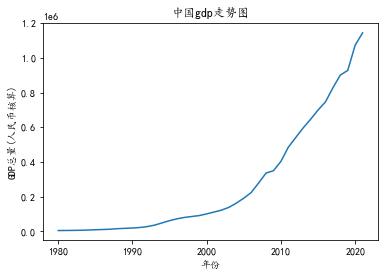

In [21]:
# 绘制中国gdp走势图
plt.figure()
plt.plot(all_gdp_cn['年份'],all_gdp_cn['GDP总量(人民币核算)'])
plt.xlabel('年份')
plt.ylabel('GDP总量(人民币核算)')
plt.title('中国gdp走势图')
plt.show()

中国gdp增速图

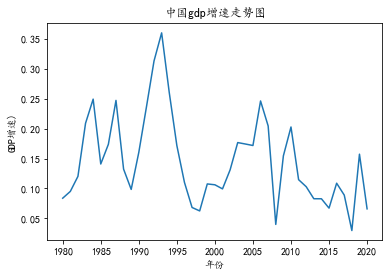

In [24]:
#计算GDP增速

all_gdp_cn['gdp增速'] = (all_gdp_cn['GDP总量(人民币核算)'].shift(-1)-all_gdp_cn['GDP总量(人民币核算)'])/all_gdp_cn['GDP总量(人民币核算)']
# 绘制中国GDP增速走势图
plt.figure()
plt.plot(all_gdp_cn['年份'],all_gdp_cn['gdp增速'])
plt.xlabel('年份')
plt.ylabel('GDP增速)')
plt.title('中国gdp增速走势图')
plt.show()

2021年GDP排名在前20各州的比例

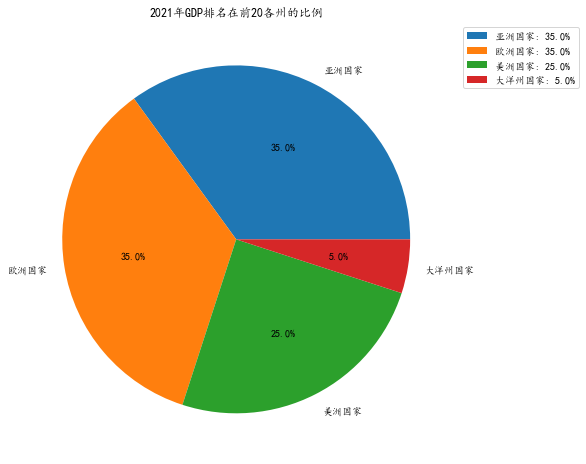

In [23]:
# 得到2021年各国GDP数据
all_gdp_2021 = all_gdp[all_gdp['年份']==2021]
# 对2021年gdp排名在前20的国家所属洲分组聚合，统计各州国家个数
all_gdp_2021_top = all_gdp_2021[all_gdp_2021['排名'].apply(eval)<=20]
pie_plt=all_gdp_2021_top.groupby(['所属洲']).count()['国家/地区'].sort_values(ascending=False) 
comment_sum=pie_plt.values.sum()
plt.figure(figsize=(8,8))  
percen=[np.round(each/comment_sum*100,2) for each in pie_plt.values]
plt.pie(pie_plt.values,labels=pie_plt.index,autopct="%3.1f%%") 
plt.legend([str(pie_plt.index[i])+': '+str(percen[i])+"%" for i in range(len(percen))],loc="upper right",bbox_to_anchor=(0.3, 0, 1, 1))  
plt.title("2021年GDP排名在前20各州的比例") 
plt.show()

中国GDP排名走势

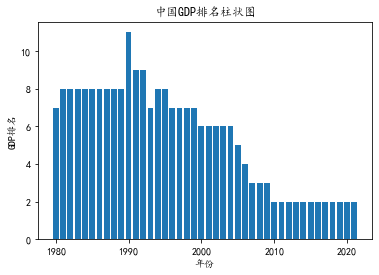

In [25]:
# 排名转换数据类型
all_gdp_cn['排名'] = all_gdp_cn['排名'].astype(int)
plt.figure()
plt.bar(all_gdp_cn['年份'],all_gdp_cn['排名'])
plt.xlabel('年份')
plt.ylabel('GDP排名')
plt.title('中国GDP排名柱状图')
plt.show()

中美GDP历年走势图

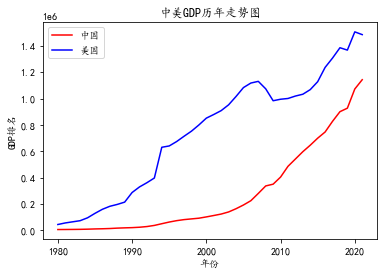

In [27]:
# 筛选得到美国数据
all_gdp_us= all_gdp[all_gdp['国家/地区']=='美国'].copy()
# 绘制中美GDP走势对照图
plt.figure()
plt.plot(all_gdp_cn['年份'],all_gdp_cn['GDP总量(人民币核算)'],c='r',label='中国')
plt.plot(all_gdp_cn['年份'],all_gdp_us['GDP总量(人民币核算)'],c='b',label='美国')
plt.xlabel('年份')
plt.ylabel('GDP排名')
plt.legend()
plt.title('中美GDP历年走势图')
plt.show()

中美GDP增速历年走势图

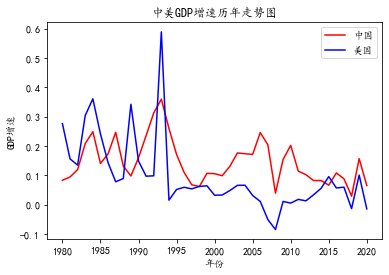

In [29]:
# 计算美国GDP增速
all_gdp_us['gdp增速'] = (all_gdp_us.loc[:,'GDP总量(人民币核算)'].shift(-1)-all_gdp_us.loc[:,'GDP总量(人民币核算)'])/all_gdp_us.loc[:,'GDP总量(人民币核算)']
# 绘制中美gdp增速对照图
plt.figure()
plt.plot(all_gdp_cn['年份'],all_gdp_cn['gdp增速'],c='r',label='中国')
plt.plot(all_gdp_cn['年份'],all_gdp_us['gdp增速'],c='b',label='美国')
plt.xlabel('年份')
plt.ylabel('GDP增速')
plt.title('中美GDP增速历年走势图')
plt.legend()
plt.rc('axes', unicode_minus=False)
plt.show()

对中国GDP 数据拟合并预测未来走势

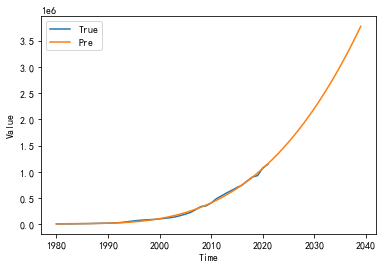

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# 提取训练数据和测试数据
train_start = 1980
train_end = 2022
test_start = 2023
test_end = 2040

train_data = all_gdp_cn[(all_gdp_cn['年份'] >= train_start) & (all_gdp_cn['年份'] <= train_end)]
test_data= [i for i in range(train_start,test_end)]
test_data = np.array(test_data).reshape(-1, 1)


# 提取训练数据
X_train = train_data['年份'].values.reshape(-1, 1)
y_train= train_data['GDP总量(人民币核算)'].values.reshape(-1, 1)


# 创建多项式特征
polynomial_features = PolynomialFeatures(degree=3)  # 二次多项式
X_train_poly = polynomial_features.fit_transform(X_train)

# 训练模型
model = LinearRegression()
model.fit(X_train_poly, y_train)

# 预测所有年份数据
# X_all = train_data['年份'].values.reshape(-1, 1)

X_all_poly = polynomial_features.transform(test_data)
y_pred = model.predict(X_all_poly)

# 绘制真实值和预测值
plt.plot(all_gdp_cn['年份'], all_gdp_cn['GDP总量(人民币核算)'], label='True')
plt.plot(test_data, y_pred, label='Pre')

# plt.title()
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [33]:
from sklearn.metrics import r2_score
score1 = r2_score(y_train, y_pred[:len(y_train)])
print(score1)

0.9971727399376015
